# Breakdown of this notebook:
1. **Data Challenge**<br>
2. **Importing Necessary Libraries**: <br>
3. **Exercise 1:** Data Engineering. <br>
  -  Exercise 1.1: Load .csv for Player_Summaries, Game_Publishers, Game_Genres, Game_Developers, Games_1 into  dataframes
  -  Exercise 1.2 : Join all `Games_` tables into one dataframe
     - Analyzing Each variable before Merging
         - Game_Publishers: Solving Data issues -Missing values, Unrecognized characters
         - Game_Genres: Solving Data issues -Missing values
         - Game_Developers: Solving Data issues -Missing values, Unrecognized characters
         - Games: Solving Data issues -Missing values
     - Joining all `Games_` tables into one dataframe.
  - Exercise 1.3 : Count the number of games per `publisher` and per `genre`
  - Exercise 1.4 :Find day and hour when most new accounts were created (based on Player_Summaries table)
  
4. **Exercise 2:** Analytics. <br>
 - Joining AppidInfo and Achievement_Percentages datasets to Games dataset for detailed Analysis.
 - Data Cleaning of AppidInfo and Achievement_Percentages datasets.
 - Analytics using PowerBI
     - Univariant Analysis
     - BiVariant Analysis
     - Player Analysis
     - Last_Logout  Analysis
 
5. **Exercise 3**: Predictive Modelling using Machine Learning
 - Dropping unnecessary variables
 - Extracting year,month and day from Release_Date Varaible
 - Customizing Dataset
 - performing One-Hot Encoding on Categorical Columns
 - Seperating Dependent and independent variables
 - Performing Normalization to get rid of scale
 - splitting data in train and test
 - Model training
 - Perfomance Evaluation
 
6. **Data Loading:** using Pyspark.
 - Loading Necessary Libraries
 - Initiating Spark Session
 - Data Loading into Spark Dataframes
 - Displaying type of Data
 - Closing Spark Session

7. **Further work:**
 
8. **Time Spend on Dataset:** 

### Data Challenge

- Steam is the ultimate destination for playing, discussing, and creating games. It is one of the largest gaming networks in the world with over 100 million active gamers. The Steam dataset covers 109 million user accounts, 196 million friendships, 3 million groups, 384 million owned games, and a collective 1 million years of playtime. <br>

- Data is provided in seperate Excel CSV files named Games_1,Games_2,Games_Developers,Games_Genres,Games_Publishers,Groups,Player_Summaries,Achievement_Percentages,App_ID_Info,Friends <br>

- The Task is to<br>
-- Integrate individual sheets into a consolidated File(Data Engineering)<br>
-- Perform Analytics to extract and present insights from the Steam dataset (Data Analytics)  <br>
-- Build a Predictive model using Machine Learning Techniques (Predictive Modelling)



In [2]:
#Loading Necessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from datetime import datetime

from sklearn.linear_model import LinearRegression

#pip3 install xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn import model_selection


### Exercise 1: Data Engineering
#### Exercise 1 : •Load .csv for Player_Summaries, Game_Publishers, Game_Genres, Game_Developers, Games_1 into  dataframes

In [4]:
#Loading data using Pandas library
Player_Summaries=pd.read_csv("Player_Summaries.csv")

Game_Publishers=pd.read_csv("Games_Publishers.csv")
Game_Genres=pd.read_csv("Games_Genres.csv")
Game_Developers=pd.read_csv("Games_Developers.csv")
Games =pd.read_csv("Games_1.csv")

AppidInfo=pd.read_csv("App_ID_Info.csv")

Achievement_Percentages=pd.read_csv("Achievement_Percentages.csv")

In [5]:
Game_Publishers.head()

,appid,Publisher
0,207990,NaN
1,215220,NaN
2,220824,NaN
3,241600,NaN
4,249310,NaN


In [6]:
print(type(Game_Publishers))
print(type(Game_Genres))
print(type(Game_Developers))
print(type(Games))
print(type(Player_Summaries))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


####  Exercise 1.2 : Join all `Games_` tables into one dataframe

##### Analyzing Each variable before Merging

 ######  Game_Publishers

In [7]:
#Showing first rows od data
Game_Publishers.head()

,appid,Publisher
0,207990,NaN
1,215220,NaN
2,220824,NaN
3,241600,NaN
4,249310,NaN


In [8]:
#Shape of the data
Game_Publishers.shape

(18761, 2)

In [9]:
#Checking Null values
Game_Publishers.isnull().sum()

appid           0
Publisher    2634
dtype: int64

In [10]:
#Checking Uniques Publishers in the data
Game_Publishers.Publisher.unique()

array([nan, ' ', '-', ..., 'QianZhiHuDong Network Technology Co., Ltd.',
       ' GungHo Online Entertainment America, Inc.\t',
       'Trend Redaktions- und Verlagsgesellschaft mbH'], dtype=object)

In [11]:
#Checking Duplicates
Game_Publishers[Game_Publishers['appid'].duplicated()].count()

appid        978
Publisher    978
dtype: int64

In [12]:
Game_Publishers.describe(include='O')

,Publisher
count,16127
unique,4422
top,Ubisoft
freq,384


Upon exploration, It is evident that dataset have problems of 
- Missing values<br>
- Unrecognized characters in publisher names<br>
- Duplicated Appids
    - As some apps have multiple publishers and thus numerous distinct rows with the same appid are possible

1. Dealing with Unrecognized characters and Missing values

In [13]:
#Relpacing Special Characters with Nulls
Game_Publishers['Publisher'].replace(' ',np.NaN,inplace=True)
Game_Publishers['Publisher'].replace('-',np.NaN,inplace=True)

In [14]:
#Checking Null values
Game_Publishers.isnull().sum()

appid           0
Publisher    2643
dtype: int64

In [15]:
#Imputing Null values with Unknown Publishers
Game_Publishers['Publisher'].fillna('Unknown',inplace=True)

In [16]:
#Checking Null values after Imputation
Game_Publishers.isnull().sum()

appid        0
Publisher    0
dtype: int64

In [17]:
#Number of unique Game publishers
Game_Publishers.Publisher.nunique()

4421

After Preprocessing Game_Publishers is rid of data problems and next step is to perform same kind of analysis on Game_Genres, Game_Developers and Game_1 dataset

#### Game_Genres

In [18]:
#Checking first 2 rows of data
Game_Genres.head(2)

,appid,Genre
0,7290,RPG
1,8980,RPG


In [19]:
#Checking missing values
Game_Genres.isnull().sum()

appid    0
Genre    0
dtype: int64

In [20]:
#checking unique values in data
Game_Genres.Genre.unique()

array(['RPG', 'Indie', 'Action', 'Casual', 'Racing', 'Sports', 'Strategy',
       'Adventure', 'Education', 'Utilities', 'Accounting', 'Simulation',
       'Early Access', 'Free to Play', 'Photo Editing', 'Web Publishing',
       'Audio Production', 'Video Production', 'Software Training',
       'Animation & Modeling', 'Design & Illustration',
       'Massively Multiplayer'], dtype=object)

In [21]:
#Duplucates
Game_Genres[Game_Genres['appid'].duplicated()].count()

appid    22474
Genre    22474
dtype: int64

In [22]:
#Data Description
Game_Genres.describe(include='O')

,Genre
count,39669
unique,22
top,Indie
freq,7982


#### Game_Developers 

In [23]:
#Checking first 2 rows
Game_Developers.head(2)

,appid,Developer
0,462530,8i
1,452420,M2


In [24]:
#Checking nulls
Game_Developers.isnull().sum()

appid        0
Developer    0
dtype: int64

In [25]:
#finding unique values
Game_Developers.Developer.unique()

array(['8i', 'M2', 'UD', ...,
       'Ubisoft Montreal, Massive Entertainment, and Ubisoft Shanghai',
       'RedLynx, in collaboration with  Ubisoft Shanghai, Ubisoft Kiev',
       'Ubisoft Quebec, in collaboration with Ubisoft Annecy, Bucharest,'],
      dtype=object)

### Games

In [26]:
#first 3 rows
Games.head(3)

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved
0,76561198001291264,8870,NaN,1392.0,2013-06-09 01:01:03 UTC
1,76561198001291264,400,NaN,239.0,2013-06-09 01:01:03 UTC
2,76561198001291264,212910,NaN,130.0,2013-06-09 01:01:03 UTC


In [27]:
#Shape of data
Games.shape

(628117, 5)

In [28]:
#checking nulls
Games.isnull().sum()

steamid                  0
appid                    0
playtime_2weeks     598900
playtime_forever    227568
dateretrieved            0
dtype: int64

In [29]:
(598900)/628117*100

95.34847807016845

95% of data in playtime_2weeks are containing missing values.Henceforth dropping playtime_2weeks from the data

In [30]:
#dropping playtime_2weeks
Games.drop(columns='playtime_2weeks',inplace=True)

In [31]:
#Checking nulls
Games.isnull().sum()

steamid                  0
appid                    0
playtime_forever    227568
dateretrieved            0
dtype: int64

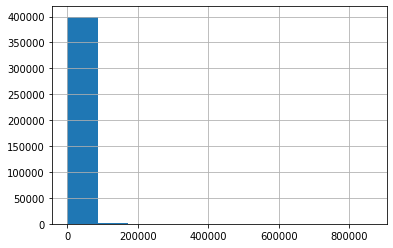

In [32]:
#Distribution of playtime_forever to find  imputation method
Games.playtime_forever.hist()

In [33]:
#correlation of data
Games.corr()

,steamid,appid,playtime_forever
steamid,1.000000,0.230677,0.003607
appid,0.230677,1.000000,-0.070402
playtime_forever,0.003607,-0.070402,1.000000


In [34]:
#Replacing nulls with 0 playtime
Games.playtime_forever.fillna(0,inplace=True)

In [35]:
#checking nulls after imputation
Games.isnull().sum()

steamid             0
appid               0
playtime_forever    0
dateretrieved       0
dtype: int64

In [36]:
#checking duplicates
Games[Games[['steamid','appid']].duplicated()]

,steamid,appid,playtime_forever,dateretrieved


### Joining all `Games_` tables into one dataframe.

In [37]:
#shapes of data
Game_Publishers.shape,Game_Genres.shape,Game_Developers.shape,Games.shape

((18761, 2), (39669, 2), (19333, 2), (628117, 4))

In [38]:
#Joining all `Games_` tables into one dataframe upon appid and inner join
df_game=pd.merge(Game_Publishers,Game_Genres,on='appid').merge(Game_Developers,on='appid').merge(Games,on='appid')

In [39]:
#first 3 rows
df_game.head(3)

,appid,Publisher,Genre,Developer,steamid,playtime_forever,dateretrieved
0,241600,Unknown,RPG,Cellar Door Games,76561198073971712,115.0,2013-09-20 17:25:58 UTC
1,241600,Unknown,RPG,Cellar Door Games,76561198065133569,331.0,2013-09-10 10:39:20 UTC
2,241600,Unknown,RPG,Cellar Door Games,76561198029167368,536.0,2013-07-20 02:22:23 UTC


####  Exercise 1.3 : Count the number of games per `publisher` and per `genre`.

In [40]:
df_game.groupby(['Publisher','Genre'])[['appid','steamid']].nunique().head(10)

appid  steamid
Publisher      Genre                     
11 bit studios Action          2      415
               Indie           2      415
               Strategy        2      415
17-BIT         Indie           1        5
               Strategy        1        5
1C Company     Action          6      151
               Adventure       1       45
               RPG             8      351
               Racing          3       48
               Simulation      2       67

#### Exercise 1.4 :Find day and hour when most new accounts were created (based on Player_Summaries table)

In [41]:
#Top 3 rows of Player_summaries data
Player_Summaries.head(3)

,steamid,personaname,profileurl,avatar,avatarmedium,avatarfull,personastate,communityvisibilitystate,profilestate,lastlogoff,...,primaryclanid,timecreated,gameid,gameserverip,gameextrainfo,cityid,loccountrycode,locstatecode,loccityid,dateretrieved
0,76561198024350932,DGJarski,http://steamcommunity.com/profiles/76561198024...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2011-12-07 02:31:52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-08 01:48:13
1,76561197972375740,Kregger,http://steamcommunity.com/profiles/76561197972...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2013-02-18 03:53:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-28 14:38:19
2,76561197972581736,3ulle+ C@+cher,http://steamcommunity.com/profiles/76561197972...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,3,1.0,2011-08-29 18:36:52,...,1.035828e+17,2004-12-29 09:00:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-28 14:38:22


In [42]:
#Extracting Date and hour from time created variable
pd.to_datetime(Player_Summaries.timecreated).dt.strftime("%Y-%m-%d %H").value_counts()

NaT              14810
2012-12-25 10      292
2012-12-25 08      279
2012-12-25 11      230
2012-11-28 11      219
                 ...  
2010-05-04 19        1
2005-01-18 01        1
2010-04-28 05        1
2010-04-30 18        1
2010-05-07 13        1
Name: timecreated, Length: 7340, dtype: int64

Upon exploration most new accounts were created on 2012-12-25 at 10AM

### Exercise 2: Analytics

Joining AppidInfo and Achievement_Percentages datasets to Games dataset for detailed Analysis

#### AppidInfo

In [43]:
#First 2 rows of data
AppidInfo.head(2)

,appid,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer
0,392230,Littlstar VR Cinema,game,0.0,1970-01-01 00:00:00 UTC,-1,0,0
1,440000,Portal 2: Exhumaos,mod,0.0,1970-01-01 00:00:00 UTC,-1,0,0


In [44]:
#Checking nulls values
AppidInfo.isnull().sum()

appid             0
Title             0
Type              0
Price             0
Release_Date      0
Rating            0
Required_Age      0
Is_Multiplayer    0
dtype: int64

In [45]:
#Data Description
AppidInfo.describe()

,appid,Price,Rating,Required_Age,Is_Multiplayer
count,17783.000000,17783.000000,17783.000000,17783.000000,17783.000000
mean,296291.919924,9.222197,9.485970,1.399876,0.310521
std,122344.889934,14.556212,26.041012,4.629384,0.462720
min,10.000000,0.000000,-1.000000,0.000000,0.000000
25%,236440.000000,1.990000,-1.000000,0.000000,0.000000
50%,324300.000000,4.990000,-1.000000,0.000000,0.000000
75%,388471.000000,9.990000,-1.000000,0.000000,1.000000
max,469850.000000,449.990000,96.000000,18.000000,1.000000


Minimum value of Rating is labelled as -1 which is not applicable

In [46]:
#Unique values in Rating variable
AppidInfo.Rating.unique()

array([-1, 71, 67, 74, 81, 63, 38, 85, 79, 73, 72, 77, 76, 82, 70, 75, 64,
       33, 61, 66, 59, 84, 52, 57, 69, 80, 60, 27, 65, 68, 90, 43, 86, 83,
       88, 87, 51, 78, 91, 58, 62, 56, 96, 45, 50, 39, 89, 54, 92, 49, 93,
       55, 53, 47, 46, 94, 32, 42, 36, 30, 44, 41, 48, 95, 29, 22, 40, 34,
       24, 20, 37, 35], dtype=int64)

In [47]:
#Replacing -1 as null values
AppidInfo.replace(-1,np.NaN,inplace=True)

In [48]:
#Checking nulls
AppidInfo.isnull().sum()

appid                 0
Title                 0
Type                  0
Price                 0
Release_Date          0
Rating            15246
Required_Age          0
Is_Multiplayer        0
dtype: int64

In [49]:
#Shape of data
AppidInfo.shape

(17783, 8)

In [50]:
15246/17783*100

85.73356576505653

85% of data in Ratings variables are not applicable.Heceforth Dropping for the data

In [51]:
#Dropping rating column
AppidInfo.drop(columns='Rating',inplace=True)

In [52]:
#Checking nulls
AppidInfo.isnull().sum()

appid             0
Title             0
Type              0
Price             0
Release_Date      0
Required_Age      0
Is_Multiplayer    0
dtype: int64

In [53]:
#Chekcing Duplicates
AppidInfo[AppidInfo['appid'].duplicated()]

,appid,Title,Type,Price,Release_Date,Required_Age,Is_Multiplayer


#### Achievement_Percentages

In [54]:
#First 3 rows
Achievement_Percentages.head(3)

,appid,Name,Percentage
0,50,ach0,0.091038
1,50,ach1,0.088308
2,50,ach2,0.088496


In [55]:
#NUll values
Achievement_Percentages.isnull().sum()

appid           0
Name          428
Percentage      0
dtype: int64

In [56]:
#Shape of the data
Achievement_Percentages.shape

(156253, 3)

In [57]:
#Replacing will unknown name
Achievement_Percentages.Name.fillna("Unknown",inplace=True)

In [58]:
#NUll values after imputation
Achievement_Percentages.isnull().sum()

appid         0
Name          0
Percentage    0
dtype: int64

Joining AppidInfo and Achievement_Percentages datasets to Games dataset for detailed Analysis

In [59]:
#Shapes of data
df_game.shape,AppidInfo.shape

((1116326, 7), (17783, 7))

In [60]:
#joing appidfo with df_game data
df=df_game.merge(AppidInfo,on='appid').merge(Achievement_Percentages,on='appid')

In [61]:
#Shape of data
df.shape

(47960465, 15)

In [62]:
#First 3 rows of data
df.head(3)

,appid,Publisher,Genre,Developer,steamid,playtime_forever,dateretrieved,Title,Type,Price,Release_Date,Required_Age,Is_Multiplayer,Name,Percentage
0,241600,Unknown,RPG,Cellar Door Games,76561198073971712,115.0,2013-09-20 17:25:58 UTC,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_ANIMALS,21.96420
1,241600,Unknown,RPG,Cellar Door Games,76561198073971712,115.0,2013-09-20 17:25:58 UTC,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_BLINDNESS,3.48766
2,241600,Unknown,RPG,Cellar Door Games,76561198073971712,115.0,2013-09-20 17:25:58 UTC,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_BONES,1.81957


In [63]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### Analytics using PowerBI

In [64]:
#df.to_excel("SteamData.xlsx")  

#### Univariant Analysis
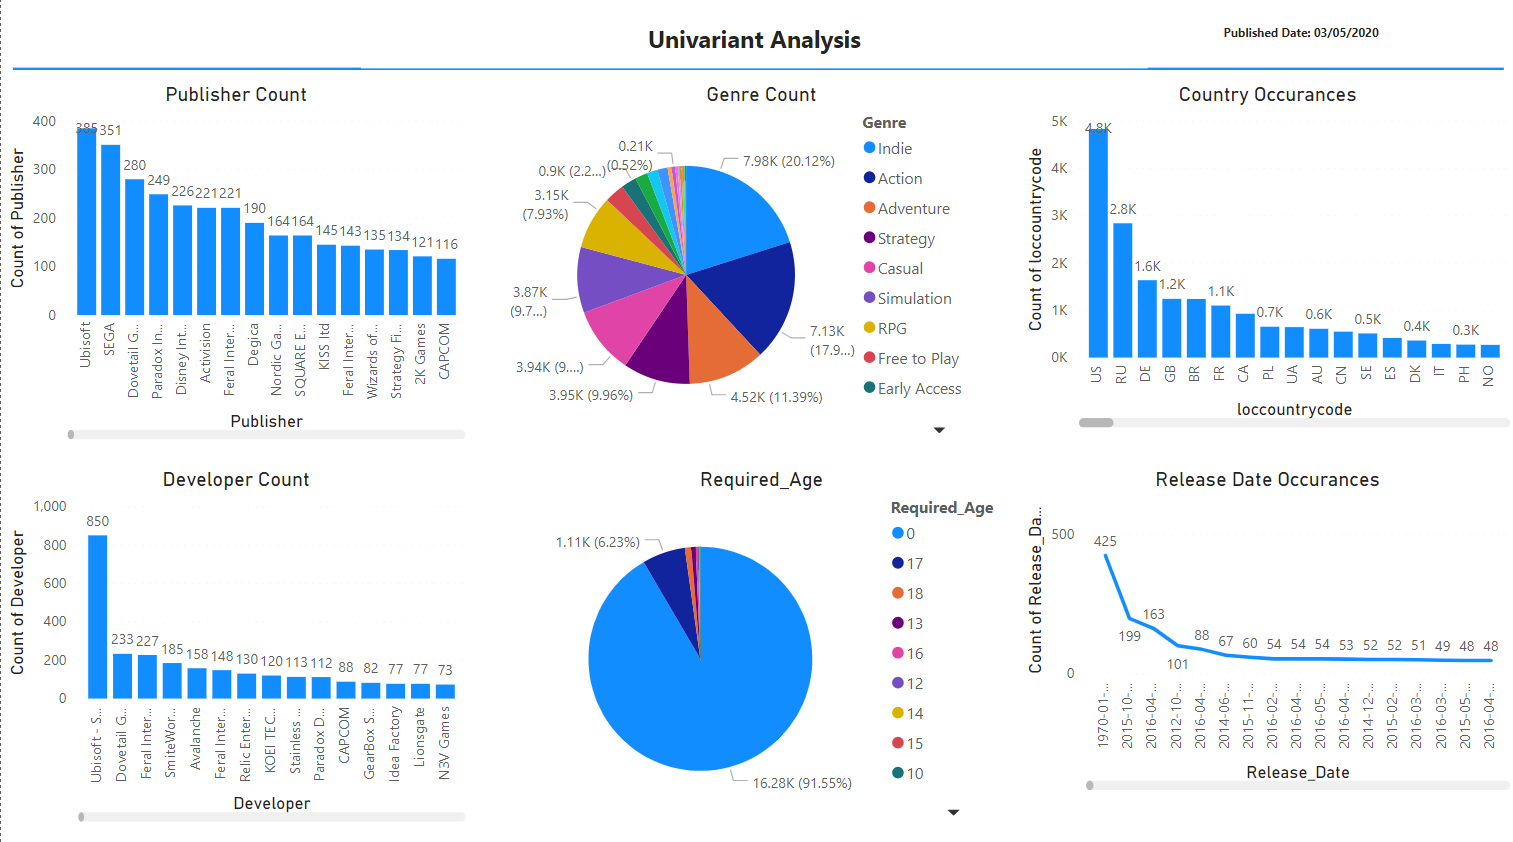
##### Observations:
-Upon Performing univariant Analysis on each variable.Here are the top in the list
    - Ubisoft Publisher is at top with count of 385
    - Also Ubisoft- San Fransico is the top developer with 850
    - Indie Genre has a count of 7.98k which is contributing 20.12%
    - 91.55% of the occurances has no age limit on steam games
    - US is the highest country containing 4.8k count
    - Release Date in 1970 comparitively has more occurances 

#### BiVariant Analysis
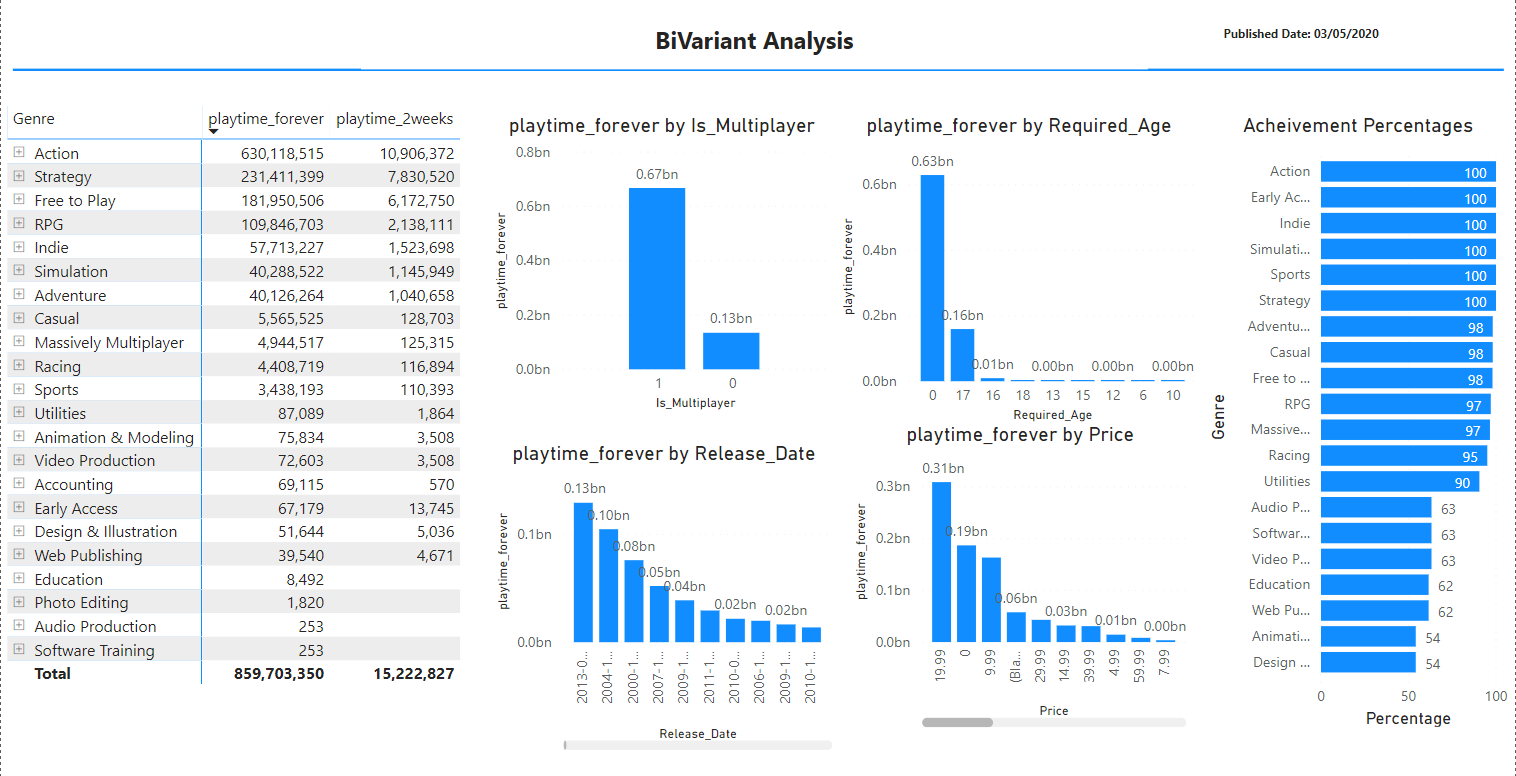
##### Observations:
- Considering Playtime as addictive behaviour, highest play time has been recorded for Action Genre,Multiplayer content,no age restriction and 2013 released games
- Price might not be the concerns as Games with 19.99USD recorded highest Playtime
- Players might be after Acheivement Sucess Percentages, highest playtime are recorded with highest Percentages


#### Player Summary Analysis
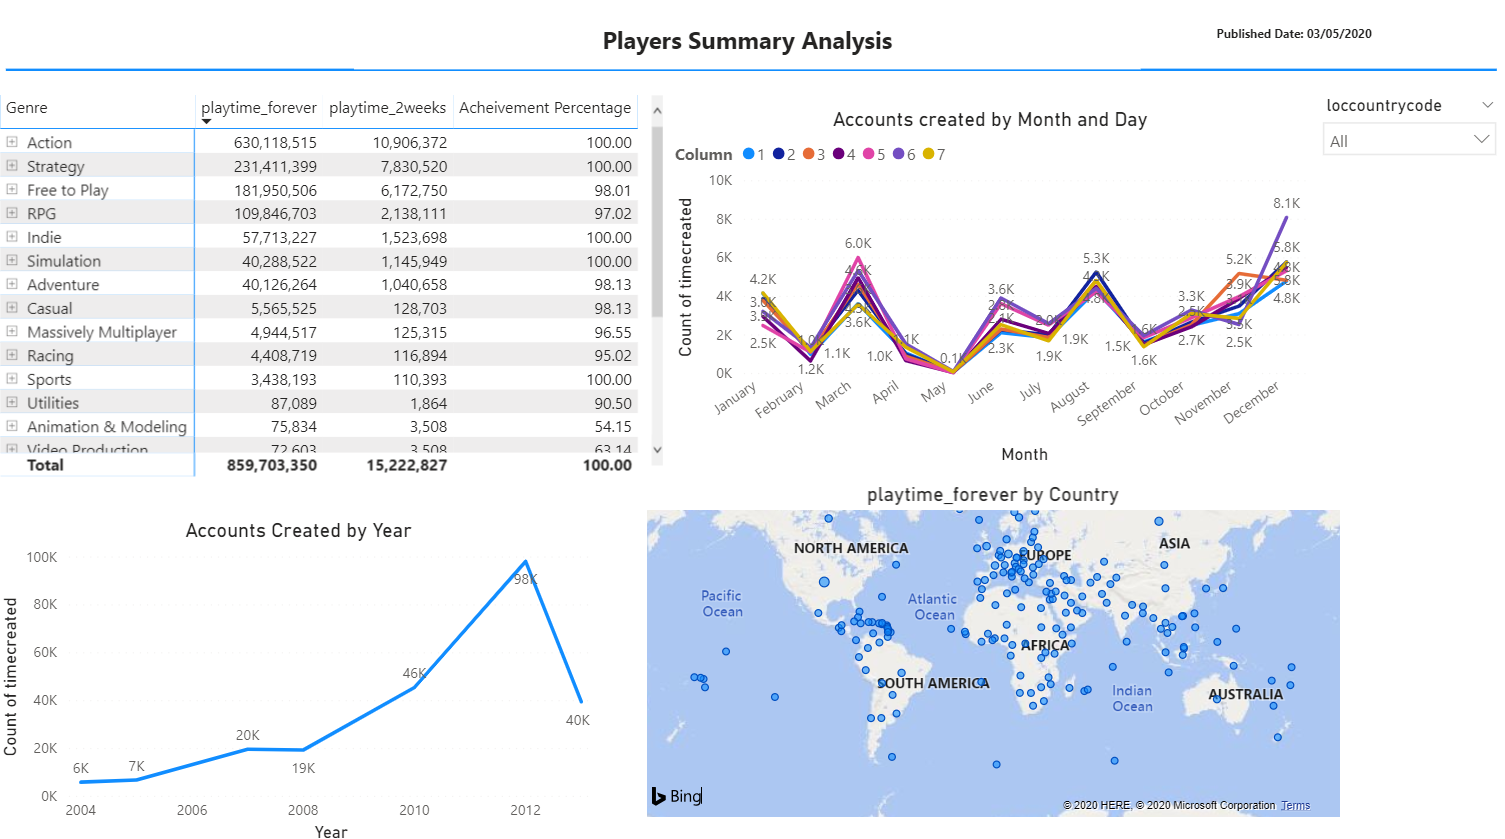
##### Observations:
- A Linear pattern can be observed til the year 2012 in the accounts created and a there is a slight decrease after 2012 
- Highest accounts got created in the year 2012 
- Similarly December,August and March recorded top 3 months of accounts created
- Europe has the highest player comparitively

### Exercise 3: Predictive Modelling using Machine Learning

In [65]:
#Copying to Data 
data=df.copy()

In [66]:
#Dropping unnecessary variables
data.drop(columns=['appid','steamid','dateretrieved'],inplace=True)

In [67]:
#First 3 rows of data
data.head(3)

,Publisher,Genre,Developer,playtime_forever,Title,Type,Price,Release_Date,Required_Age,Is_Multiplayer,Name,Percentage
0,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_ANIMALS,21.96420
1,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_BLINDNESS,3.48766
2,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_BONES,1.81957


In [68]:
#Extracting year,month and day from Release_Date Varaible
data['Year']=pd.to_datetime(data.Release_Date).dt.year
data['Month']=pd.to_datetime(data.Release_Date).dt.month
data['day']=pd.to_datetime(data.Release_Date).dt.day
data.head(3)

,Publisher,Genre,Developer,playtime_forever,Title,Type,Price,Release_Date,Required_Age,Is_Multiplayer,Name,Percentage,Year,Month,day
0,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_ANIMALS,21.96420,2013,6,27
1,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_BLINDNESS,3.48766,2013,6,27
2,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,2013-06-27 00:00:00 UTC,0,0,FEAR_OF_BONES,1.81957,2013,6,27


In [69]:
#Dropping Release_Date
data.drop(columns='Release_Date',inplace=True)

In [70]:
#First 2 rows after dropping Release_Date
data.head(2)

,Publisher,Genre,Developer,playtime_forever,Title,Type,Price,Required_Age,Is_Multiplayer,Name,Percentage,Year,Month,day
0,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,0,0,FEAR_OF_ANIMALS,21.96420,2013,6,27
1,Unknown,RPG,Cellar Door Games,115.0,Rogue Legacy,game,14.99,0,0,FEAR_OF_BLINDNESS,3.48766,2013,6,27


In [71]:
data_model=data.iloc[:,[1,2,3,5,6,7,8,10,11,12]]
data_model.head(3)

,Genre,Developer,playtime_forever,Type,Price,Required_Age,Is_Multiplayer,Percentage,Year,Month
0,RPG,Cellar Door Games,115.0,game,14.99,0,0,21.96420,2013,6
1,RPG,Cellar Door Games,115.0,game,14.99,0,0,3.48766,2013,6
2,RPG,Cellar Door Games,115.0,game,14.99,0,0,1.81957,2013,6


In [72]:
#Categorical Columns
columns=['Type','Genre','Developer']

In [73]:
#Function to perform One-Hot Encoding on Categorical Columns
def category_onehot_multcols(multcolumns):
    df_final=data_model
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(data_model[fields],drop_first=True)
        
        data_model.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([data_model,df_final],axis=1)
        
    return df_final

In [74]:
data_model.shape

(47960465, 10)

In [76]:
#Performing One-hot Encoding on data_model
#data_model=category_onehot_multcols(columns)# unable to do because of memory computational errors

In [77]:
#First 3 lines after encoding
data_model.head(3)

,Developer,playtime_forever,Price,Required_Age,Is_Multiplayer,Percentage,Year,Month
0,Cellar Door Games,115.0,14.99,0,0,21.96420,2013,6
1,Cellar Door Games,115.0,14.99,0,0,3.48766,2013,6
2,Cellar Door Games,115.0,14.99,0,0,1.81957,2013,6


In [78]:
# Seperating Dependent and independent variables
y=data_model['playtime_forever']
x=data_model.drop(columns='playtime_forever')

In [79]:
#Information abt x
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47960465 entries, 0 to 47960464
Data columns (total 7 columns):
Developer         object
Price             float64
Required_Age      int64
Is_Multiplayer    int64
Percentage        float64
Year              int64
Month             int64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.9+ GB


In [81]:
#Performing Normalization to get rid of scale # unable to do because of memory computational errors
#from sklearn.preprocessing import StandardScaler
#scalar = StandardScaler()
#x_scaled = scalar.fit_transform(x)

In [84]:
#splitting data in train and test. # unable to do because of memory computational errors
#from sklearn.model_selection import train_test_split
#train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25, random_state=12)
#Checking Shapes
#train_x.shape,train_y.shape,test_x.shape,test_y.shape

In [ ]:
#Fitting Modelto train data # unable to do because of memory computational errors
#from xgboost import XGBRegressor
#model_xg=XGBRegressor()
#model_xg.fit(train_x,train_y)

In [ ]:
#Prediction
#y_pred=model_xg.predict(test_x)
#from sklearn.metrics import r2_score
#r2_score(y_pred,test_y)

### Data Loading using Pyspark

In [85]:
#Loading Necessary Libraries
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()
from pyspark.sql import SparkSession

In [86]:
#Initiating Spark Session
if __name__ == "__main__":
    sc = SparkSession .builder\
        .appName("SteamGaming")\
        .getOrCreate()

In [87]:
#Data Loading into Spark Dataframes
Player_Summaries=sc.read.csv("Player_Summaries.csv",header=True)
Game_Publishers=sc.read.csv("Games_Publishers.csv",header=True)
Game_Genres=sc.read.csv("Games_Genres.csv",header=True)
Game_Developers=sc.read.csv("Games_Developers.csv",header=True)
Games_1 =sc.read.csv("Games_1.csv",header=True)

In [88]:
#Displaying type of Data
print(type(Games_1))
print(type(Game_Publishers))
print(type(Game_Genres))
print(type(Game_Developers))
print(type(Player_Summaries))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>


In [89]:
#First 5 rows of data
Game_Publishers.show(5)

+------+---------+
| appid|Publisher|
+------+---------+
|207990|     null|
|215220|     null|
|220824|     null|
|241600|     null|
|249310|     null|
+------+---------+
only showing top 5 rows



In [90]:
# end the spark session
sc.stop()

### Further work
- Implementation of DataPreprocessing and ML modelling using Pyspark if required
- Implementing advanced Imputation techniques
- Data Enrichment with Player Summary Data
- Handiling categorical variables more effectively
- Feature Selection and Elimination
- ML modelling and Hyper parameter Tuning
- Model Deployement if required

### Time Spend on Dataset including Documentation -2 Days
- Day 1 
    - Data Understanding
    - Exercise 1: Data Engineering
        - Data Loading
        - Exploring Challenges in Data 
        - Data Pre-processing 
    - Exercise 2: Data Analytics
    
- Day 2
    - Exercise 2: Data Analytics
    - Exercise 3: Predictive Modelling
    - Data loading using Pyspark 